In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [2]:
n_images = pd.read_csv('../data/processed/n_images_for_part.csv')

## Load one image, see how it is

In [3]:
path = n_images.iloc[0, :].path
img = cv2.imread('../data/' + path)

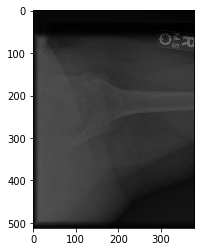

In [4]:
plt.imshow(img)

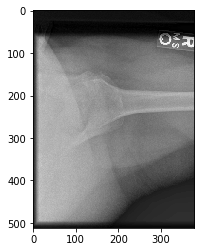

In [5]:
img_bw = cv2.imread('../data/'+path, 0)
plt.imshow(img_bw, cmap='gray')

Grayscale image seems to be brighter, exactly what we want. 

View after reshape

In [6]:
img2 = cv2.resize(img_bw, (256, 256))

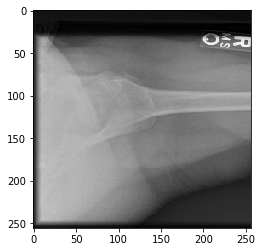

In [7]:
plt.imshow(img2, cmap='gray')

## Load all images in B/W

In [8]:
n_len = len(n_images)
images = np.zeros(shape=(n_len, 256, 256), dtype=np.uint8)
for idx, row in n_images.iterrows():
        
    img_row = cv2.imread('../data/' + row.path, cv2.IMREAD_GRAYSCALE)
    img_row = cv2.resize(img_row, (256, 256))
    #img_row = cv2.cvtColor(img_row, cv2.COLOR_BGR2GRAY)  already B/W
    #img_row = cv2.adaptiveThreshold(img_row, 255, 
    #                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 
    #                                25, 2)
    images[idx] = img_row

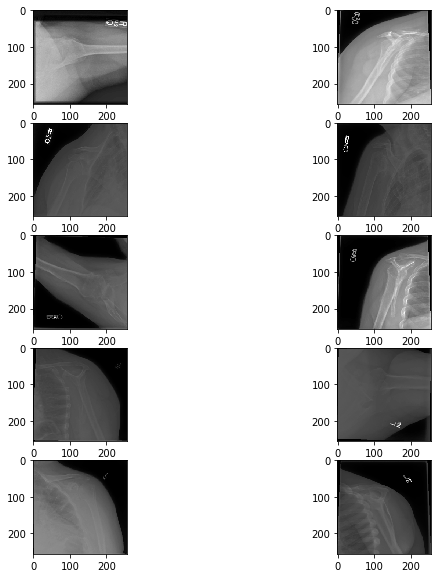

In [9]:
plt.figure(figsize=(10, 10))
for sub in np.arange(10):
    plt.subplot(5, 2, sub + 1)
    plt.imshow(images[sub], cmap='gray')

## Perform PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2, random_state=666)

Flatten images, so as to make a table, with rows representing images and columns representing the pixel values for each pixel.

In [15]:
pca_images = images.reshape(-1, 256 * 256)

In [16]:
pca.fit(pca_images)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=666,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
reduced_images = pca.transform(pca_images)

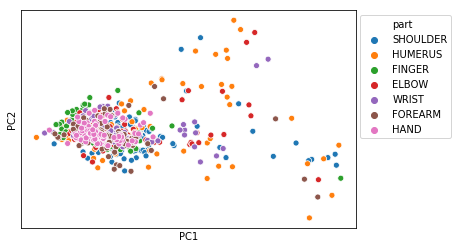

In [25]:
sns.scatterplot(x=reduced_images[:, 0], y=reduced_images[:, 1], hue=n_images.part)
plt.legend(loc=1, bbox_to_anchor=(1.3, 1))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [19]:
sum(pca.explained_variance_ratio_)

0.5154799752354203

Even with 50% variance explained, we see that the clusters are not very separable, thus traditional ML algo will not work very well.